In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import loadmat

def load_data(file_name):
    mat_data = loadmat(f'dataLDA/{file_name}.mat')

    x_array = mat_data['X']
    y_array = mat_data['Y']

    x_numpy_array = np.array(x_array)
    y_numpy_array = np.array(y_array, dtype=int)
    # Transfer 0 to -1, meet PLA iteration requirement
    y_numpy_array[0,y_numpy_array[0,:] == 0] = -1
    return x_numpy_array, y_numpy_array

def load_data_5d(file_name, x_key, y_key):
    mat_data = loadmat(f'dataLDA/{file_name}.mat')

    x_array = mat_data[x_key]
    y_array = mat_data[y_key]

    x_numpy_array = np.array(x_array)
    y_numpy_array = np.array(y_array, dtype=int)
    return x_numpy_array, y_numpy_array

def calc_x_tilde(training_x):
    new_row = np.ones((1, training_x.shape[1]), dtype=int)
    new_matrix = np.insert(training_x, 0, new_row, axis=0)
    return new_matrix

def calc_minus_l(training_x_tilde, training_y,theta):
    n=training_y.shape[1]
    l = 0
    for i in range(n):
        l += training_y[0,i]*np.dot(theta,training_x_tilde[:,i])-np.log(1+np.exp(-np.dot(theta,training_x_tilde[:,i])))
    return -l

# 改的函数 49行
def calc_PLA(training_x_tilde,training_y,theta,epsilon,iteration_max):
    n = training_y.shape[1]
    l_history = np.zeros(iteration_max)
    delta_l_history =np.zeros(iteration_max)
    number = 0
    continuousCount = 0
    for number in range(iteration_max):
        i = np.mod(number, n)
        value = np.dot(theta,training_x_tilde[:,i])
        theta = theta + ((training_y[0,i]-np.sign(value))*0.5) * training_x_tilde[:,i]

        if np.sign(value) == training_y[0,i]:
            continuousCount += 1
            if continuousCount>n:
                break
            else:
                continue
        else:
            continuousCount = 0

    return l_history, theta,delta_l_history,number

def PLA_classifier(theta,testing_x):
    testing_x_tilde=np.insert(testing_x, 0, 1)
    value = np.dot(theta,testing_x_tilde)
    return np.sign(value)

def PLA_classifier_function(theta,x):
    return -theta[0]/theta[2]-theta[1]*x/theta[2]

In [35]:
file_name = 'synthetic1'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.zeros(d+1)
epsilon = 0.01
iteration_max = 5000
training_x_tilde = calc_x_tilde(training_x)

l_history, theta ,delta_l_history,iteration_time= calc_PLA(training_x_tilde,training_y,theta,epsilon,iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = PLA_classifier(theta,training_x[:,i])

risk = np.sum(training_y_hat != training_y[0,:])/n

print('theta = ',theta)
print('iteration_time = ',iteration_time)
print('risk:',risk)


theta =  [-1.5         1.57996435  1.33345992]
iteration_time =  609
risk: 0.0


__header__
__version__
__globals__
X
Y


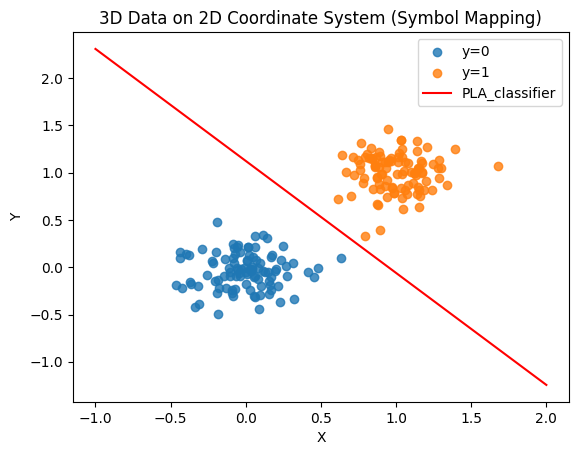

In [36]:
from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic1.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,2,500);
g1_value=[PLA_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='PLA_classifier',color='r');
plt.legend()
plt.show()

In [37]:
file_name = 'synthetic2'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.zeros(d+1)
epsilon = 0.01
iteration_max = 5000
training_x_tilde = calc_x_tilde(training_x)

l_history, theta ,delta_l_history,iteration_time= calc_PLA(training_x_tilde,training_y,theta,epsilon,iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = PLA_classifier(theta,training_x[:,i])

risk = np.sum(training_y_hat != training_y[0,:])/n

print('theta = ',theta)
print('iteration_time = ',iteration_time)
print('risk:',risk)

theta =  [-0.5        -0.29870768  5.21172923]
iteration_time =  4999
risk: 0.13


__header__
__version__
__globals__
X
Y
w
b


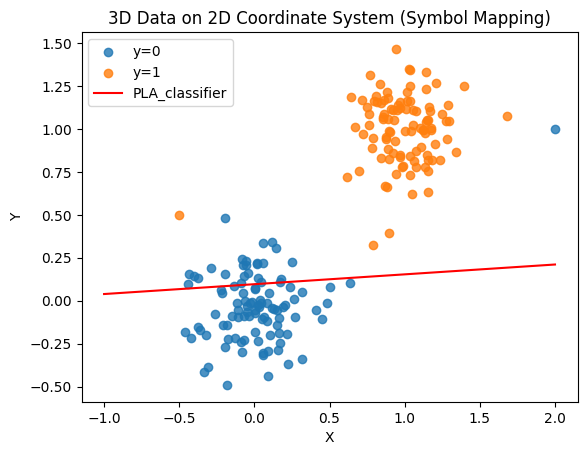

In [38]:
from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic2.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,2,500);
g1_value=[PLA_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='PLA_classifier',color='r');
plt.legend()
plt.show()

In [39]:
file_name = 'synthetic3'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.zeros(d+1)
epsilon = 0.01
iteration_max = 5000
training_x_tilde = calc_x_tilde(training_x)

l_history, theta ,delta_l_history,iteration_time= calc_PLA(training_x_tilde,training_y,theta,epsilon,iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = PLA_classifier(theta,training_x[:,i])

risk = np.sum(training_y_hat != training_y[0,:])/n

print('theta = ',theta)
print('iteration_time = ',iteration_time)
print('risk:',risk)

theta =  [1.5        0.44858372 4.55008336]
iteration_time =  4999
risk: 0.39


__header__
__version__
__globals__
X
Y


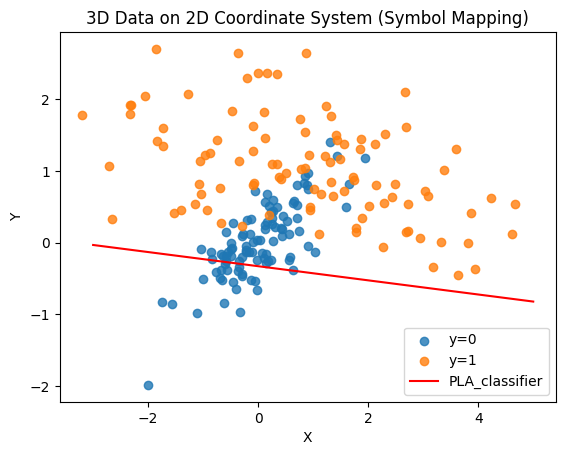

In [40]:
from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic3.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-3,5,500);
g1_value=[PLA_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='PLA_classifier',color='r');
plt.legend()
plt.show()

In [41]:
file_name = 'synthetic4'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.zeros(d+1)
epsilon = 0.01
iteration_max = 5000
training_x_tilde = calc_x_tilde(training_x)

l_history, theta ,delta_l_history,iteration_time= calc_PLA(training_x_tilde,training_y,theta,epsilon,iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = PLA_classifier(theta,training_x[:,i])

risk = np.sum(training_y_hat != training_y[0,:])/n

print('theta = ',theta)
print('iteration_time = ',iteration_time)
print('risk:',risk)

theta =  [-2.5         2.29613191  3.52087302]
iteration_time =  4999
risk: 0.265


__header__
__version__
__globals__
X
Y


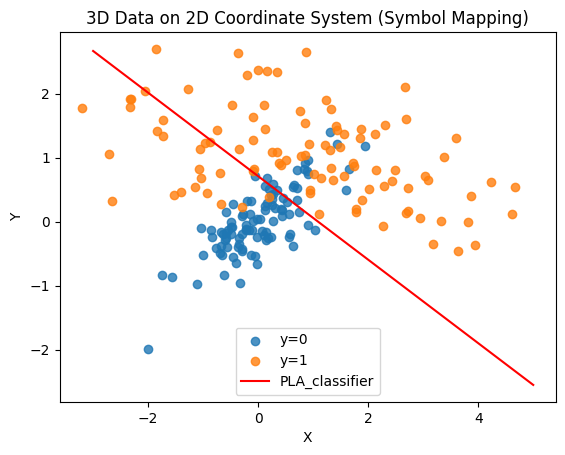

In [42]:
from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic3.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-3,5,500);
g1_value=[PLA_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='PLA_classifier',color='r');
plt.legend()
plt.show()